<a href="https://colab.research.google.com/github/yohanesnuwara/numerical-method/blob/master/euler_proof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# On the Sums of Series of Reciprocals

Inspired by [a great article by Marco Tavora in Towards Data Science](https://towardsdatascience.com/on-the-sums-of-series-of-reciprocals-6711437ad893)

Code written by Yohanes Nuwara

<div>
<img src="https://user-images.githubusercontent.com/51282928/77248847-4b606680-6c6f-11ea-983c-3b212b235328.jpg" width="300"/>
</div>

*Dedicated to the greatest mathematician of all time, Leonhard Euler (1707-1783)*

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy.special

## Taylor Series of exponential function $e^x$

$$e^x=1+x+\frac{x^2}{2!}+\frac{x^3}{3!}+...$$

### Real function

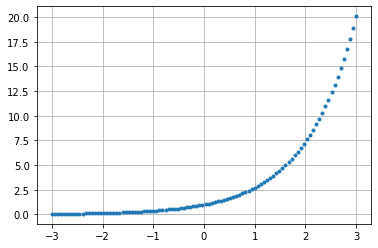

In [0]:
x = np.linspace(-3, 3, 100)
y_exp = np.exp(x)

plt.plot(x, y_exp, '.')
plt.grid(True)

### Approximated function

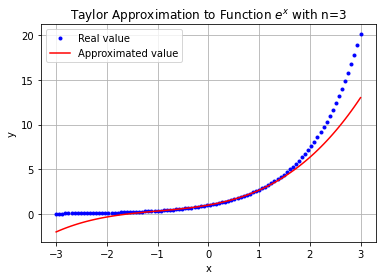

In [0]:
n = 3 # adjust
x = np.linspace(-3, 3, 100)

ys = []
for j in range(len(x)):
  yn = []
  for i in range(0,n+1):
    y = (x[j]**i) / scipy.special.factorial(i)
    yn.append(float(y))
  ysum = np.sum(yn)
  ys.append(float(ysum))

p1 = plt.plot(x, y_exp, '.', color='blue')
p2 = plt.plot(x, ys, color='red')
plt.title('Taylor Approximation to Function $e^x$ with n={}'.format(n))
plt.legend((p1[0], p2[0]), (['Real value', 'Approximated value']))
plt.xlabel('x'); plt.ylabel('y')
plt.grid(True)

## Bernoulli Numbers

Solving Bernoulli numbers $B_k$ from the following summation:

$$\sum_{k=1}^{n-1} \frac{n!}{k!(n-k)!} B_k=0$$


In [0]:
from fractions import Fraction as Fr

count = 20 # how many bernoulli numbers will be created

def bernoulli(n):
    A = [0] * (n+1)
    for m in range(n+1):
        A[m] = Fr(1, m+1)
        for j in range(m, 0, -1):
          A[j-1] = j*(A[j-1] - A[j])
    return A[0] # (which is Bn)
 
bn = [(i, bernoulli(i)) for i in range(count+1)]
# bn = [(i, b) for i,b in bn if b] # filter the odd sequence
width = max(len(str(b.numerator)) for i,b in bn)
print('Bernoulli numbers until n={}'.format(count))
for i,b in bn:
    print('B(%2i) = %*i/%i' % (i, width, b.numerator, b.denominator))

Bernoulli numbers until n=20
B( 0) =       1/1
B( 1) =       1/2
B( 2) =       1/6
B( 3) =       0/1
B( 4) =      -1/30
B( 5) =       0/1
B( 6) =       1/42
B( 7) =       0/1
B( 8) =      -1/30
B( 9) =       0/1
B(10) =       5/66
B(11) =       0/1
B(12) =    -691/2730
B(13) =       0/1
B(14) =       7/6
B(15) =       0/1
B(16) =   -3617/510
B(17) =       0/1
B(18) =   43867/798
B(19) =       0/1
B(20) = -174611/330


In [0]:
# convert fractions to decimal
b2n = []
for j in range(len(bn)):
  bernoulli = np.float64(bn[j][1])
  print('B({}) = {}'.format(j, bernoulli))
  b2n.append(float(bernoulli))

# output: b2n

B(0) = 1.0
B(1) = 0.5
B(2) = 0.16666666666666666
B(3) = 0.0
B(4) = -0.03333333333333333
B(5) = 0.0
B(6) = 0.023809523809523808
B(7) = 0.0
B(8) = -0.03333333333333333
B(9) = 0.0
B(10) = 0.07575757575757576
B(11) = 0.0
B(12) = -0.2531135531135531
B(13) = 0.0
B(14) = 1.1666666666666667
B(15) = 0.0
B(16) = -7.092156862745098
B(17) = 0.0
B(18) = 54.971177944862156
B(19) = 0.0
B(20) = -529.1242424242424
B(21) = 0.0


For odd sequence, except $1$, bernoulli number is $0$

## Taylor Series of tangent function $\tan(x)$

Bernoulli numbers are applied to compute tangent function approximated using Taylor series. In the formulation, Bernoulli numbers ($B_{2n}$) is used. 

$$\tan(x) = \sum_{n=1}^{\infty}(-1)^{n+1} \frac{2^{2n}(2^{2n}-1)}{(2n)!}B_{2n}x^{2n-1}$$

### Real function

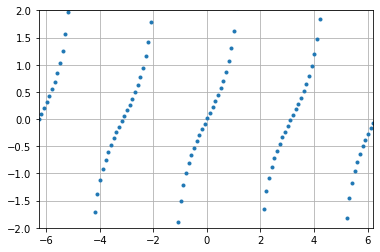

In [0]:
x = np.arange(-2*np.pi, 2*np.pi, 0.1)
y = np.tan(x)

# Insert a NaN where the difference between successive points is negative
y[:-1][np.diff(y) < 0] = np.nan

plt.plot(x, y, '.')
plt.xlim(min(x), max(x)); plt.ylim(-2,2)
plt.grid(True)

### Approximated function

In [0]:
degree = 30
x = np.deg2rad(degree)
count = 20

# compute bernoulli numbers
def bernoulli(n):
    A = [0] * (n+1)
    for m in range(n+1):
        A[m] = Fr(1, m+1)
        for j in range(m, 0, -1):
          A[j-1] = j*(A[j-1] - A[j])
    return A[0] # (which is Bn)
 
bn = [(i, bernoulli(i)) for i in range((2 * count)+1)]

# convert fractions to decimal
b2n = []
for j in range(len(bn)):
  bernoulli = np.float64(bn[j][1])
  b2n.append(float(bernoulli))

# compute tangent approximation
series = []
for n in range(1, count+1):
  a = (-1)**(n+1)
  numerator = (2**(2*n)) * ((2**(2*n)) - 1)
  denominator = scipy.special.factorial(2*n)
  bernoulli = b2n[2*n]
  serie = a * (numerator / denominator) * bernoulli * (x**(2 * n - 1))
  series.append(float(serie))

tangent = np.sum(series)
print('Using Taylor series, tangent of', degree, 'degree, or in radian', x, 'is:', tangent)

Using Taylor series, tangent of 30 degree, or in radian 0.5235987755982988 is: 0.5773502691896256


Plot values of tangent for $-2\pi < x < 2\pi$ (In reality, the Taylor series for tangent function only computes for $-\frac{\pi}{2} < x < \frac{\pi}{2}$)

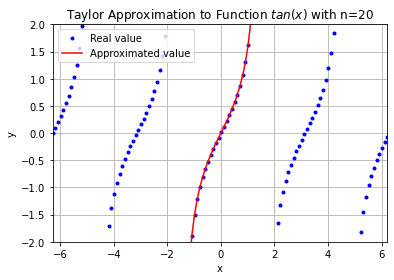

In [0]:
x = np.arange(-2*np.pi, 2*np.pi, 0.1)
count = 20

# compute bernoulli numbers
def bernoulli(n):
    A = [0] * (n+1)
    for m in range(n+1):
        A[m] = Fr(1, m+1)
        for j in range(m, 0, -1):
          A[j-1] = j*(A[j-1] - A[j])
    return A[0] # (which is Bn)
 
bn = [(i, bernoulli(i)) for i in range((2 * count)+1)]

# convert fractions to decimal
b2n = []
for j in range(len(bn)):
  bernoulli = np.float64(bn[j][1])
  b2n.append(float(bernoulli))

# compute tangent taylor series
tangents = []
for c in range(len(x)):
  series = []
  for n in range(1, count+1):
    a = (-1)**(n+1)
    numerator = (2**(2*n)) * ((2**(2*n)) - 1)
    denominator = scipy.special.factorial(2*n)
    bernoulli = b2n[2*n]
    serie = a * (numerator / denominator) * bernoulli * (x[c]**(2 * n - 1))
    series.append(float(serie))
  tangent = np.sum(series)
  tangents.append(float(tangent))

# plot
p1 = plt.plot(x, y, '.', color='blue')
p2 = plt.plot(x, tangents, color='red')
plt.xlim(min(x), max(x)); plt.ylim(-2,2)
plt.title('Taylor Approximation to Function $tan(x)$ with n={}'.format(count))
plt.legend((p1[0], p2[0]), (['Real value', 'Approximated value']))
plt.xlabel('x'); plt.ylabel('y')
plt.grid(True)

## Euler's Sum of the reciprocals of even powers of integer numbers

In Euler's paper in 1735, *De summis serierum reciprocarum*

$$\sum_{n=1}^{\infty} \frac{1}{n^{2k}}=(-1)^{k-1} \frac{2^{2k}B_{2k}}{2 \cdot (2k)!}\pi^{2k}$$

Where $k=1,2,3,...$

$k=1$, $$\sum_{n=1}^{\infty} \frac{1}{n^{2}}=\frac{1}{1^2}+\frac{1}{2^2}+\frac{1}{3^2}+...$$

$k=2$, $$\sum_{n=1}^{\infty} \frac{1}{n^{4}}=\frac{1}{1^4}+\frac{1}{2^4}+\frac{1}{3^4}+...$$

etc...

### Direct

In [0]:
k = 2
n = 100

series = []
for i in range(1, (n+1)):
  serie = 1 / (i**(2 * k))
  series.append(float(serie))

direct = np.sum(series)

print('The sum of the reciprocals of power', k, 'of integer numbers:', direct)

The sum of the reciprocals of power 2 of integer numbers: 1.0823229053444732


### Euler's Proof

In [0]:
k = 2

# compute bernoulli numbers
count = 20
def bernoulli(n):
    A = [0] * (n+1)
    for m in range(n+1):
        A[m] = Fr(1, m+1)
        for j in range(m, 0, -1):
          A[j-1] = j*(A[j-1] - A[j])
    return A[0] # (which is Bn)
 
bn = [(i, bernoulli(i)) for i in range((2 * count)+1)]

# convert fractions to decimal
b2n = []
for j in range(len(bn)):
  bernoulli = np.float64(bn[j][1])
  b2n.append(float(bernoulli))

a = -1**(k-1)
bernoulli = b2n[2*k]
numerator = (2**(2*k)) * bernoulli * (np.pi**(2*k))
denominator = 2 * scipy.special.factorial(2*k)
euler = a * (numerator / denominator)
print('Using Euler Proof, the sum of the reciprocals of power', k, 'of integer numbers:', euler)

Using Euler Proof, the sum of the reciprocals of power 2 of integer numbers: 1.082323233711138


Prove that Euler is genius, based on the comparison of above results using direct solution and his proof.

In [0]:
if np.abs(euler - direct) < 0.001:
  print('Leonhard Euler is GENIUS')

Leonhard Euler is GENIUS


### Yes, Leonhard Euler is a GENIUS MATHEMATICIAN.

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://licensebuttons.net/l/by/3.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.